In [ ]:
! pip install --upgrade pandas matplotlib seaborn scikit-learn
! pip install minisom

In [ ]:
import pandas as pd
import numpy as np
from minisom import MiniSom
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D

# 1. Data Preparation
df = pd.read_csv("data/translated.csv")
features = [
    "Age",
    "Sex",
    "Smoke",
    "Smoke_amount",
    "Height",
    "Weight",
    "BMI",
    "BSA",
    "M_mean",
    "M_median",
    "M_std",
    "M_min",
    "M_max",
    "A_mean",
    "A_median",
    "A_std",
    "A_min",
    "A_max",
    "20th_quantile",
    "25th_quantile",
    "50th_quantile",
    "75th_quantile",
]

# Handle categorical variables
df["Sex"] = df["Sex"].map({"M": 0, "F": 1})
df["Smoke"] = df["Smoke"].map({"NS": 0, "ES": 1, "SM": 2})

X = df[features].values
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


# 2. SOM Implementation and Training
def train_som(X, size, sigma, learning_rate, epochs):
    som = MiniSom(size, size, X.shape[1], sigma=sigma, learning_rate=learning_rate)
    som.random_weights_init(X)
    som.train(X, epochs)
    return som


# 3. Hyperparameter Tuning
sizes = [5, 10, 15]
sigmas = [0.5, 1.0, 1.5]
learning_rates = [0.1, 0.5, 1.0]
epochs = 1000

best_som = None
best_score = float("inf")

for size in sizes:
    for sigma in sigmas:
        for lr in learning_rates:
            som = train_som(X_scaled, size, sigma, lr, epochs)
            score = som.quantization_error(X_scaled)
            if score < best_score:
                best_score = score
                best_som = som
                best_params = (size, sigma, lr)

print(
    f"Best parameters: size={best_params[0]}, sigma={best_params[1]}, learning_rate={best_params[2]}"
)

# 4. Clustering Visualization
plt.figure(figsize=(10, 10))
plt.title("SOM Clustering")
winners = np.array([best_som.winner(x) for x in X_scaled])
plt.scatter(winners[:, 0], winners[:, 1], c=df["Age"], cmap="viridis")
plt.colorbar(label="Age")
plt.show()

# 5. Additional Visualization Techniques

# PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(10, 8))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=winners[:, 0] * winners[:, 1], cmap="viridis")
plt.title("PCA of Patient Data")
plt.xlabel("First Principal Component")
plt.ylabel("Second Principal Component")
plt.colorbar(label="SOM Cluster")
plt.show()

# t-SNE
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X_scaled)

plt.figure(figsize=(10, 8))
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=winners[:, 0] * winners[:, 1], cmap="viridis")
plt.title("t-SNE of Patient Data")
plt.xlabel("t-SNE feature 1")
plt.ylabel("t-SNE feature 2")
plt.colorbar(label="SOM Cluster")
plt.show()

# Scatter plot of key features
plt.figure(figsize=(10, 8))
plt.scatter(df["BMI"], df["Age"], c=winners[:, 0] * winners[:, 1], cmap="viridis")
plt.title("BMI vs Age")
plt.xlabel("BMI")
plt.ylabel("Age")
plt.colorbar(label="SOM Cluster")
plt.show()

# Parallel coordinates plot
from pandas.plotting import parallel_coordinates

plt.figure(figsize=(15, 8))
parallel_coordinates(
    pd.concat(
        [
            df[["Age", "BMI", "M_mean", "A_mean"]],
            pd.Series(winners[:, 0] * winners[:, 1], name="Cluster"),
        ],
        axis=1,
    ),
    "Cluster",
)
plt.title("Parallel Coordinates Plot")
plt.show()

# Heatmap of cluster centroids
centroid_grid = best_som.get_weights()
plt.figure(figsize=(12, 10))
for i, feature in enumerate(features):
    plt.subplot(5, 5, i + 1)
    plt.title(feature)
    plt.imshow(centroid_grid[:, :, i], cmap="viridis")
    plt.colorbar()
plt.tight_layout()
plt.show()

Data preparation completed.
Number of samples: 99
Number of features: 22
Feature statistics:
             Age        Sex      Smoke  Smoke_amount      Height     Weight        BMI        BSA      M_mean    M_median       M_std       M_min       M_max     A_mean    A_median       A_std       A_min       A_max  20th_quantile  25th_quantile  50th_quantile  75th_quantile
count  99.000000  99.000000  99.000000     99.000000   99.000000  99.000000  99.000000  99.000000   99.000000   99.000000   99.000000   99.000000   99.000000   99.00000   99.000000   99.000000   99.000000   99.000000      99.000000      99.000000      99.000000      99.000000
mean   64.101010   0.616162   0.272727      4.030303  161.515152  61.272727  23.445102   1.654692  382.123737  379.712121   37.003232  269.171717  509.838384  384.71303  383.909091   35.832323  274.888889  523.616162     357.590909     362.215909     381.810606     402.439394
std    13.019213   0.488794   0.511464      9.950341    8.110668   9.320614 

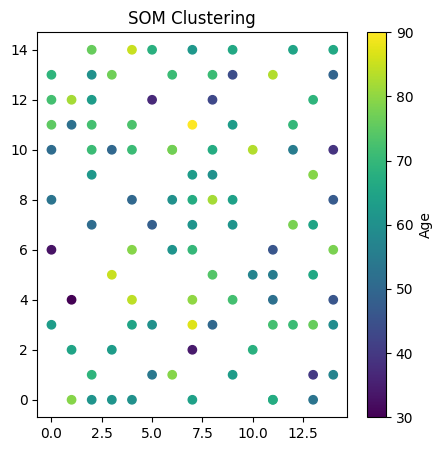

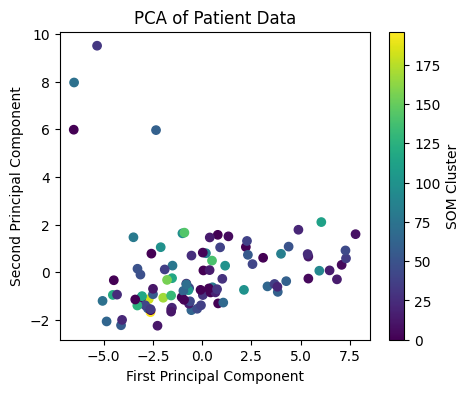

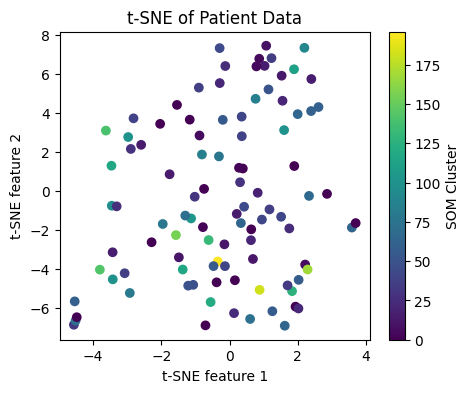

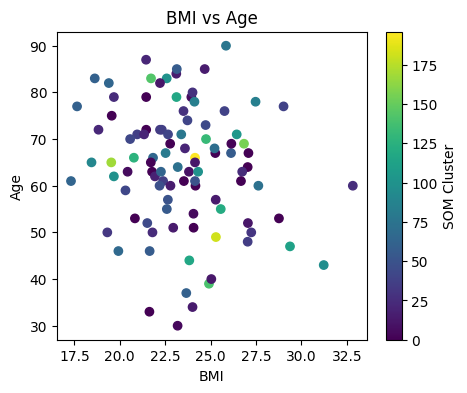

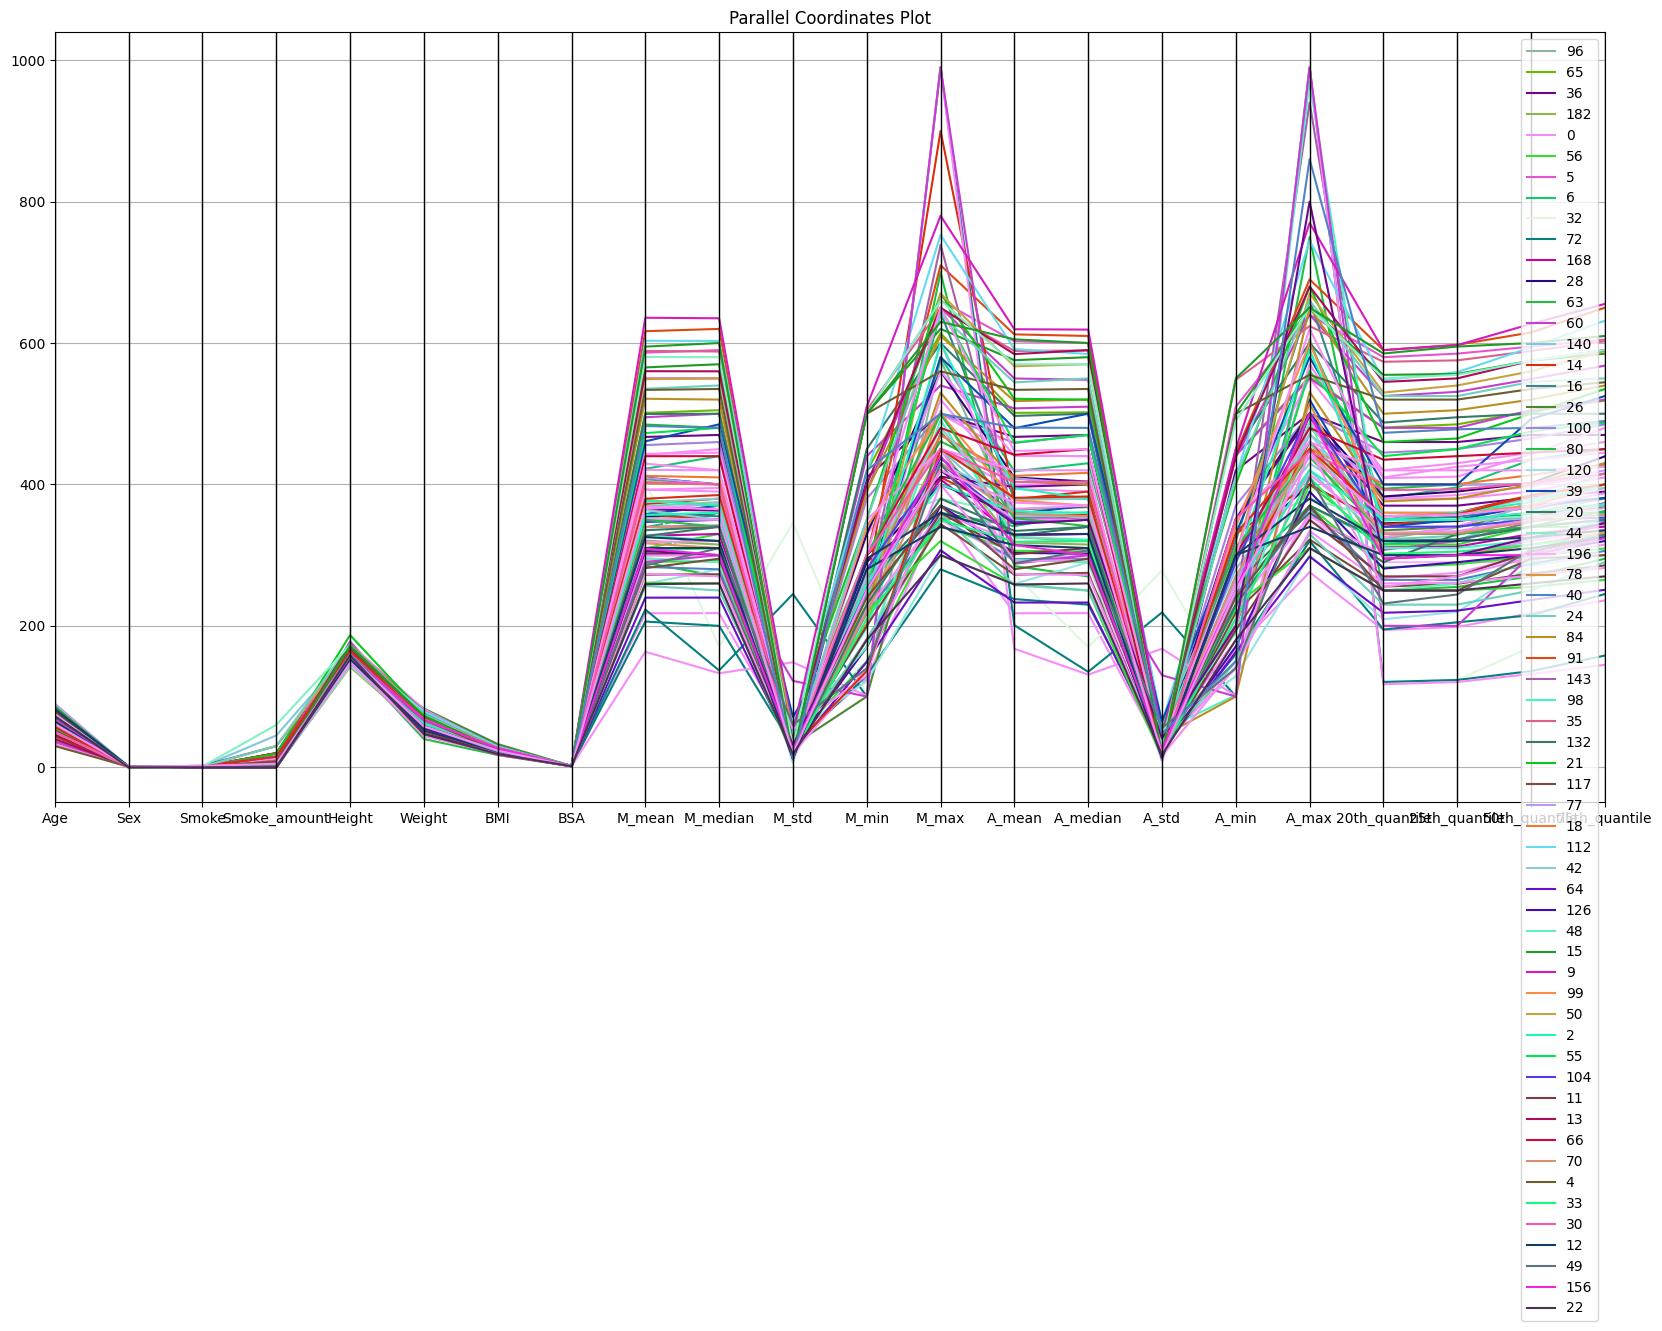

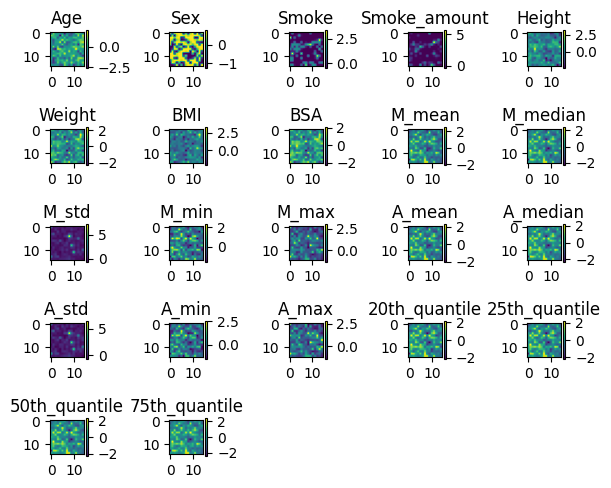

In [8]:
import pandas as pd
import numpy as np
from minisom import MiniSom
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
import json

# 1. Data Preparation
df = pd.read_csv("data/translated.csv")
features = [
    "Age",
    "Sex",
    "Smoke",
    "Smoke_amount",
    "Height",
    "Weight",
    "BMI",
    "BSA",
    "M_mean",
    "M_median",
    "M_std",
    "M_min",
    "M_max",
    "A_mean",
    "A_median",
    "A_std",
    "A_min",
    "A_max",
    "20th_quantile",
    "25th_quantile",
    "50th_quantile",
    "75th_quantile",
]

# Handle categorical variables
df["Sex"] = df["Sex"].map({"M": 0, "F": 1})
df["Smoke"] = df["Smoke"].map({"NS": 0, "ES": 1, "SM": 2})

X = df[features].values
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

print("Data preparation completed.")
print(f"Number of samples: {X.shape[0]}")
print(f"Number of features: {X.shape[1]}")
print("Feature statistics:")
print(df[features].describe().to_string())


# 2. SOM Implementation and Training
def train_som(X, size, sigma, learning_rate, epochs):
    som = MiniSom(size, size, X.shape[1], sigma=sigma, learning_rate=learning_rate)
    som.random_weights_init(X)
    som.train(X, epochs)
    return som


# 3. Hyperparameter Tuning
sizes = [5, 10, 15]
sigmas = [0.5, 1.0, 1.5]
learning_rates = [0.1, 0.5, 1.0]
epochs = 1000

best_som = None
best_score = float("inf")

print("\nHyperparameter tuning:")
for size in sizes:
    for sigma in sigmas:
        for lr in learning_rates:
            som = train_som(X_scaled, size, sigma, lr, epochs)
            score = som.quantization_error(X_scaled)
            print(f"Size: {size}, Sigma: {sigma}, Learning Rate: {lr}, Score: {score}")
            if score < best_score:
                best_score = score
                best_som = som
                best_params = (size, sigma, lr)

print(
    f"\nBest parameters: size={best_params[0]}, sigma={best_params[1]}, learning_rate={best_params[2]}"
)

print(f"Best quantization error: {best_score}")

# 4. Clustering Results
winners = np.array([best_som.winner(x) for x in X_scaled])
df["Cluster"] = winners[:, 0] * best_params[0] + winners[:, 1]

print("\nClustering results:")
print(df["Cluster"].value_counts().to_string())

print("\nCluster statistics:")
cluster_stats = df.groupby("Cluster")[features].mean()
print(cluster_stats.to_string())

# 5. Dimensionality Reduction
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X_scaled)

print("\nPCA explained variance ratio:")
print(pca.explained_variance_ratio_)

# 6. Save results to file
results = {
    "best_params": {
        "size": int(best_params[0]),
        "sigma": float(best_params[1]),
        "learning_rate": float(best_params[2]),
    },
    "best_score": float(best_score),
    "cluster_counts": df["Cluster"].value_counts().to_dict(),
    "cluster_stats": cluster_stats.to_dict(),
    "pca_explained_variance_ratio": pca.explained_variance_ratio_.tolist(),
}

with open("som_clustering_results.json", "w") as f:
    json.dump(results, f, indent=2)

print("\nResults saved to 'som_clustering_results.json'")

# 4. Clustering Visualization
plt.figure(figsize=(5, 5))
plt.title("SOM Clustering")
winners = np.array([best_som.winner(x) for x in X_scaled])
plt.scatter(winners[:, 0], winners[:, 1], c=df["Age"], cmap="viridis")
plt.colorbar(label="Age")
plt.show()

# 5. Additional Visualization Techniques

# Parallel coordinates plot
from pandas.plotting import parallel_coordinates

plt.figure(figsize=(20, 10))
parallel_coordinates(
    pd.concat(
        [df[features], pd.Series(winners[:, 0] * winners[:, 1], name="Cluster")], axis=1
    ),
    "Cluster",
)
plt.title("Parallel Coordinates Plot")
plt.show()

# PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(5, 4))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=winners[:, 0] * winners[:, 1], cmap="viridis")
plt.title("PCA of Patient Data")
plt.xlabel("First Principal Component")
plt.ylabel("Second Principal Component")
plt.colorbar(label="SOM Cluster")
plt.show()

# t-SNE
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X_scaled)

plt.figure(figsize=(5, 4))
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=winners[:, 0] * winners[:, 1], cmap="viridis")
plt.title("t-SNE of Patient Data")
plt.xlabel("t-SNE feature 1")
plt.ylabel("t-SNE feature 2")
plt.colorbar(label="SOM Cluster")
plt.show()

# Scatter plot of key features
plt.figure(figsize=(5, 4))
plt.scatter(df["BMI"], df["Age"], c=winners[:, 0] * winners[:, 1], cmap="viridis")
plt.title("BMI vs Age")
plt.xlabel("BMI")
plt.ylabel("Age")
plt.colorbar(label="SOM Cluster")
plt.show()


# Heatmap of cluster centroids
centroid_grid = best_som.get_weights()
plt.figure(figsize=(6, 5))
for i, feature in enumerate(features):
    plt.subplot(5, 5, i + 1)
    plt.title(feature)
    plt.imshow(centroid_grid[:, :, i], cmap="viridis")
    plt.colorbar()
plt.tight_layout()
plt.show()